In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [4]:
def sinh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sinh_Lambda = np.diag(np.sinh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sinh_A = V @ sinh_Lambda @ V_inv
    
    return sinh_A

def cosh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    cosh_Lambda = np.diag(np.cosh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    cosh_A = V @ cosh_Lambda @ V_inv
    
    return cosh_A



#tanh of matrix A
def tanh(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    tanh_Lambda = np.diag(np.tanh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    tanh_A = V @ tanh_Lambda @ V_inv
    
    return tanh_A

#sech of matrix A
def sech(A):
    
    # Perform the eigendecomposition of A
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Construct the diagonal matrix of exponentiated eigenvalues
    sech_Lambda = np.diag(1. / np.cosh(eigenvalues))
    
    # Matrix of eigenvectors
    V = eigenvectors
    
    # Inverse of the matrix of eigenvectors
    V_inv = np.linalg.inv(V)
    
    # Compute the matrix exponential e^A
    sech_A = V @ sech_Lambda @ V_inv
    
    return sech_A

In [5]:
#double gaussian joint amplitude
def rnm_dg(n,m):
    return np.exp( -np.pi * ((n-m)**2) / 4 - ((Tc/Tp)**2) * np.pi * ((n+m)**2) / 4)

def beta_dg(num,k):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_dg(n,m-k))
        r.append(row)
        
    return Bc*np.array(r)

#vertical gaussian joint amplitude with t1 wide
def rnm_vg(n,m):
    return np.exp( -np.pi * (m**2) / 4 - ((Tc/Tp)**2) * np.pi * (n**2) / 4)

def beta_vg(num,k):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_vg(n,m-k))
        r.append(row)
        
    return Bc*np.array(r)



#vertical gaussian joint amplitude with t2 wide
def rnm_vg_alt(n,m):
    return np.exp( -np.pi * (n**2) / 4 - ((Tc/Tp)**2) * np.pi * (m**2) / 4)

def beta_vg_alt(num,k):
    r=[]
    for n in range(-num,num):
        row=[]
        for m in range(-num,num):
            row.append(rnm_vg_alt(n,m-k))
        r.append(row)
        
    return Bc*np.array(r)

def chi(n,t,T):
    return np.sinc(t/T-n)/np.sqrt(T)

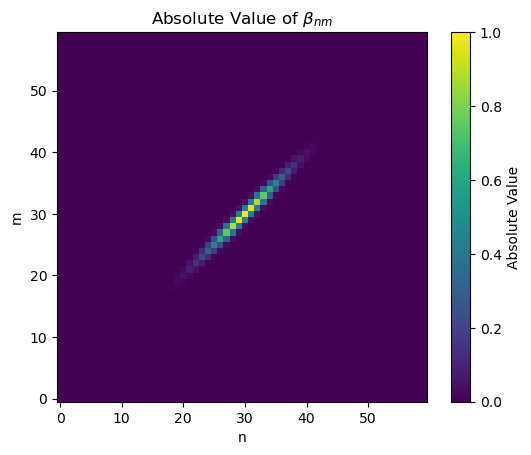

In [8]:
Tc=0.1
Tp=1
Bc=1

B=beta_dg(30,0)
U, Q = sc.linalg.polar(B, side = "left")
U, P = sc.linalg.polar(B, side = "right")
sinhP = sinh(P)
coshP = cosh(P)

def homo_trace():
    return 1+np.trace(np.linalg.matmul)

# Plot the matrix
plt.imshow(np.transpose(np.abs(B)), cmap='viridis', interpolation='none')
plt.colorbar(label='Absolute Value')
plt.title(r"Absolute Value of $\beta_{nm}$")
plt.xlabel('n')
plt.ylabel('m')
plt.gca().invert_yaxis()
plt.show()


